# Requirements

In [1]:
# Packages

# Data manipulation

import numpy as np
import pandas as pd
from datetime import datetime
import regex as re

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import missingno as msno
from IPython.display import Image


# Other configurations
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
%matplotlib inline

# Exploratory Data Analysis

In [2]:
# Data

listing = pd.read_csv('listings.csv')

In [3]:
listing.shape

(3585, 95)

The dataset is not an extensive one, it has 3.585 rows. Although it's abundant in information, it has 95 columns.

In [4]:
listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

A brief overview of what this dataset looks like

In [5]:
df = listing[['host_since','host_response_time','host_response_rate','host_is_superhost','host_neighbourhood'
            ,'host_listings_count','host_total_listings_count','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed'
            ,'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet' 
            , 'price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','minimum_nights','availability_30'
            , 'availability_60','availability_90','availability_365','number_of_reviews','first_review','last_review'
            , 'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
            , 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'
            , 'latitude','longitude']]

Df dataset is a subset of listing. The idea behind creating table df is to partition and select only the variables for the analysis. Out of the 93 columns, only 43 were selected. This selection was based on the appropriate way to answer the following question **¿What derives the price of an Airbnb property?**

Below is a list with the features after the selection process:

- **price**: The target column
- **host_since**: Date when the host started to be part of Airbnb
- **host_is_superhost**: Indicates if the host is superhost
- **neighbourhood_cleansed**: Neighbourhood of the property
- **property_type**: Property type 
- **room_type**: Room type
- **accommodates**: Number of people that coulb stay in the property
- **bathrooms**: Number of bathrooms
- **bedrooms**: Number of bedrooms
- **beds**: Number of beds
- **amenities**: property's features
- **square_feet**: Square feet of the property
- **minimum_nights**: Minimum nights staying
- **number_of_reviews**: Number of reviews
- **review_scores_rating**: Customer scores
- **review_scores_accuracy**: Customer scores
- **review_scores_cleanliness**: Customer scores
- **review_scores_checkin**: Customer scores
- **review_scores_communication**: Customer scores
- **review_scores_location**: Customer scores
- **review_scores_value**: Customer scores
- **reviews_per_month**: Customer scores
- **latitude**: Latitute where the property is located
- **longitude**: Longitude where the property is located

First order of business, null-values

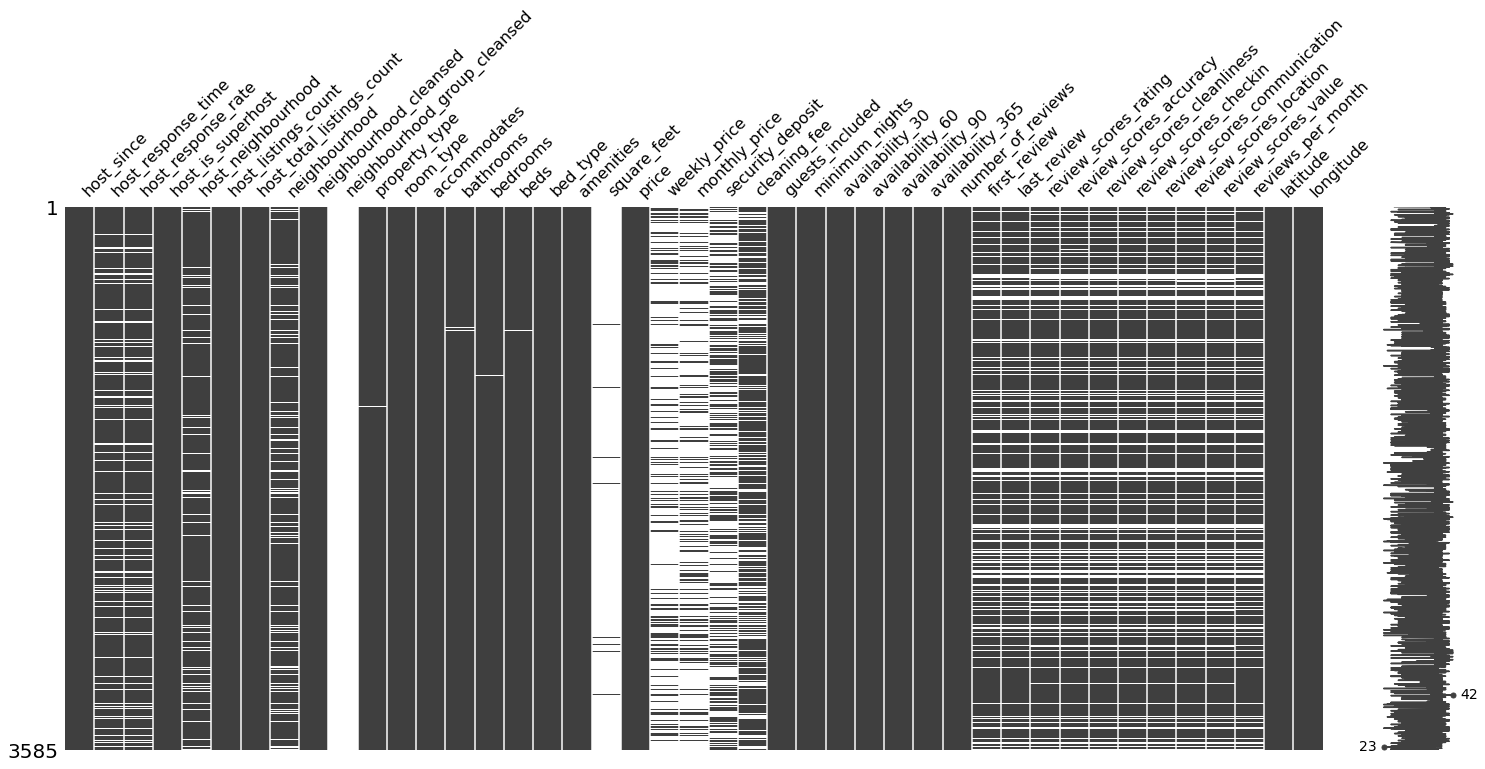

In [6]:
msno.matrix(df);

The previous graph is one way to visualize the missing data in our dataframe. The concept is simple, the rectangle is all the dataframe and the blank spaces are missing values. It's clear that there are some features that will not harmed the analysis if removed.

In [7]:
round(df[['neighbourhood_group_cleansed','square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee']]\
 .isnull().sum(axis = 0)*100 / df.shape[0])

neighbourhood_group_cleansed    100.0
square_feet                      98.0
weekly_price                     75.0
monthly_price                    75.0
security_deposit                 63.0
cleaning_fee                     31.0
dtype: float64

The above query determine the procentaje of missing values in the selected columns. *Neighbourhood_group_cleansed* and *square_feet* will be dropped due to the lack of information. *Weekly_price*, *monthly_price*, *security_deposit*  and *cleaning_fee* will be removed as well as a result of the correlation with the target variable.

In [8]:
df.drop(columns = ['neighbourhood','neighbourhood_group_cleansed','square_feet','weekly_price'
                   ,'monthly_price','security_deposit','cleaning_fee']
       , axis = 1, inplace = True)

The resulting dataframe is the following:

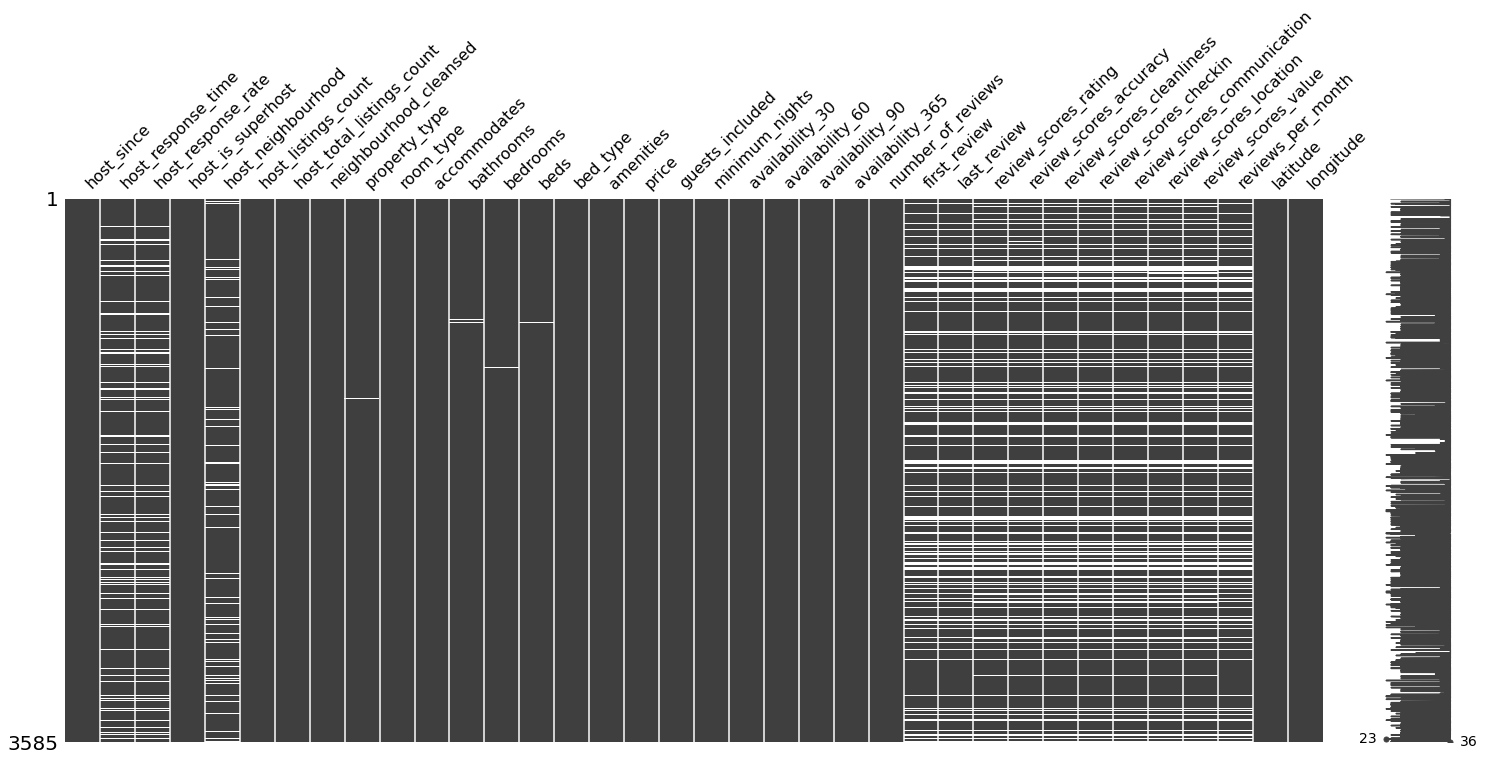

In [9]:
msno.matrix(df);

Worth noting, most of the times if one review is missing, all the reviews are missing. We'll inspect these features later on this project.

Before doing any analysis, we need to fix the format of the target value *price*. It was given to us containing dollar sign and commas in some cases.

In [10]:
df.price

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [11]:
df.loc[:, df.columns.isin(['price'])] = list(df.price.apply(lambda x: int(x[1:-3].replace(',',''))))

# Marginal distributions

With the price variable in the correct format, lets dive-in in the dataset!

## Target variable -Price

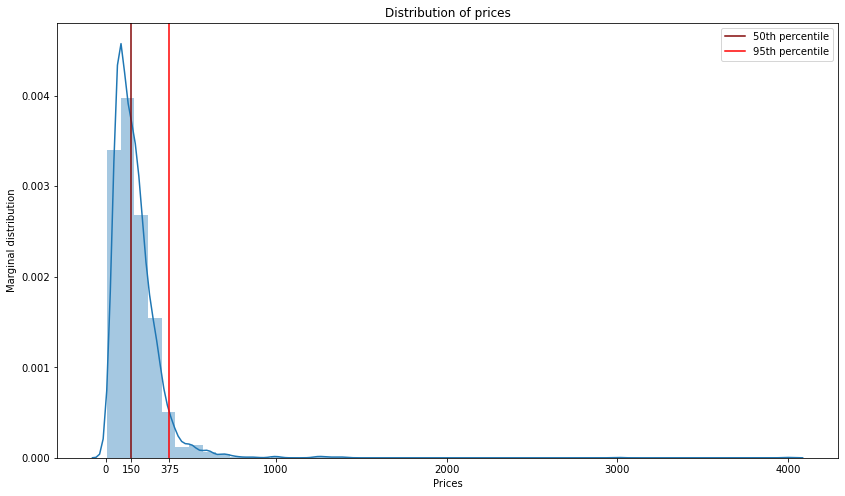

In [12]:
fig, ax = plt.subplots(figsize=(14,8));

sns.distplot(df.price)
plt.axvline(x=np.percentile(df.price,50), color = '#820707', label = '50th percentile')
plt.axvline(x=np.percentile(df.price,95), color = 'r', label = '95th percentile')
ax.set_xticks((0, np.percentile(df.price,50),np.percentile(df.price,95),1000,2000,3000,4000 ))

plt.title('Distribution of prices')
plt.xlabel('Prices')
plt.ylabel('Marginal distribution')
plt.legend();

Undoubtedly, the distribution of the target variable is skewed to the right. Additionally, two vertical lines were added to the graph, representing the median and the 95th percentile of the distribution. This last part was intended to emphasize how skewed the distribution is.

Prices over $500 are in the top 2.5% of the distribution


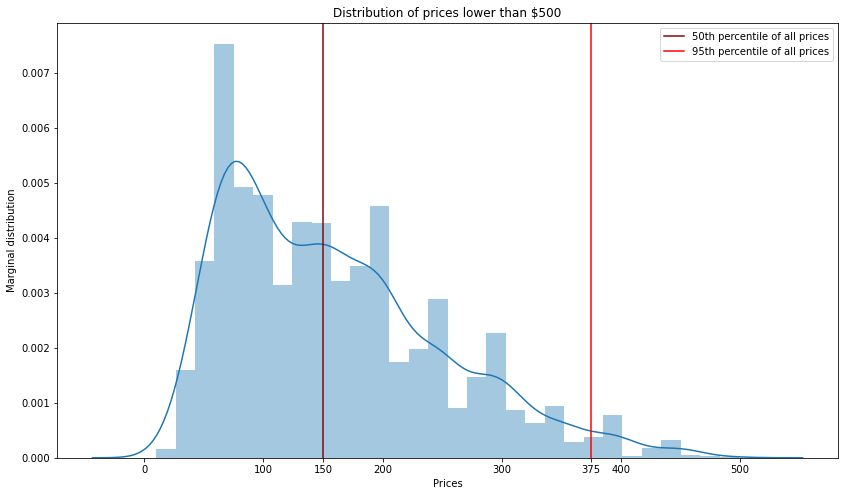

In [13]:
fig, ax = plt.subplots(figsize=(14,8));

sns.distplot(df.query('price < 500')['price'])
plt.axvline(x=np.percentile(df.price,50), color = '#820707', label = '50th percentile of all prices')
plt.axvline(x=np.percentile(df.price,95), color = 'r', label = '95th percentile of all prices')
# plt.text(x = np.percentile(df.price,95), y = 0, s = str(round(np.percentile(df.price,95))), ha='center' )
ax.set_xticks((0, 100, np.percentile(df.price,50),200, 300, np.percentile(df.price,95),400, 500 ))

plt.title('Distribution of prices lower than $500')
plt.xlabel('Prices')
plt.ylabel('Marginal distribution')
plt.legend();

print('Prices over $500 are in the top {}% of the distribution'.format(100 - (round(df.query('price < 500')['price'].count() *100 / df.shape[0],1))))

This is a close up of the prices lower than $500$. Similarly to the overall distribution, this subset of the distribution carry the same skewed problem. Although it isn't that marked.
Prices over $500$ are in the top 2.5% of the distribution

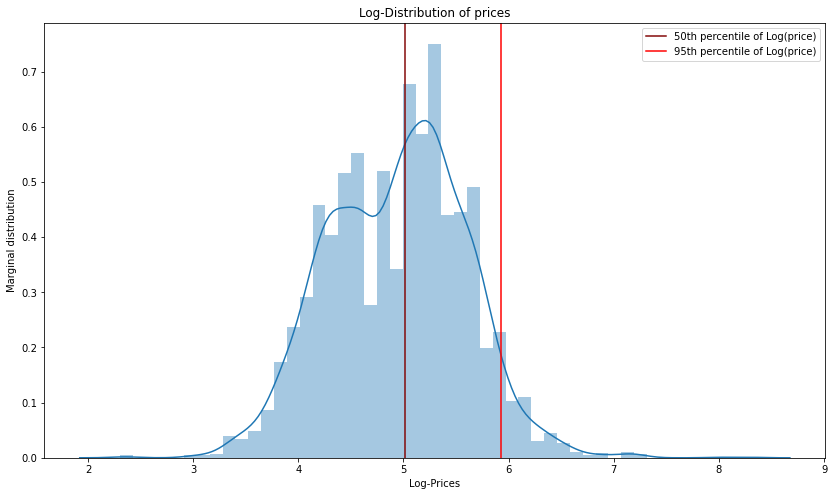

In [14]:
fig, ax = plt.subplots(figsize=(14,8));

sns.distplot(np.log(df.price))
plt.axvline(x=np.percentile(np.log(df.price),50), color = '#820707', label = '50th percentile of Log(price)')
plt.axvline(x=np.percentile(np.log(df.price),95), color = 'r', label = '95th percentile of Log(price)')

plt.title('Log-Distribution of prices')
plt.xlabel('Log-Prices')
plt.ylabel('Marginal distribution')
plt.legend();

The righ skewed was solved using a log transformation to the variable. 

In [15]:
df.price = np.log(df.price)

#  Independent variables

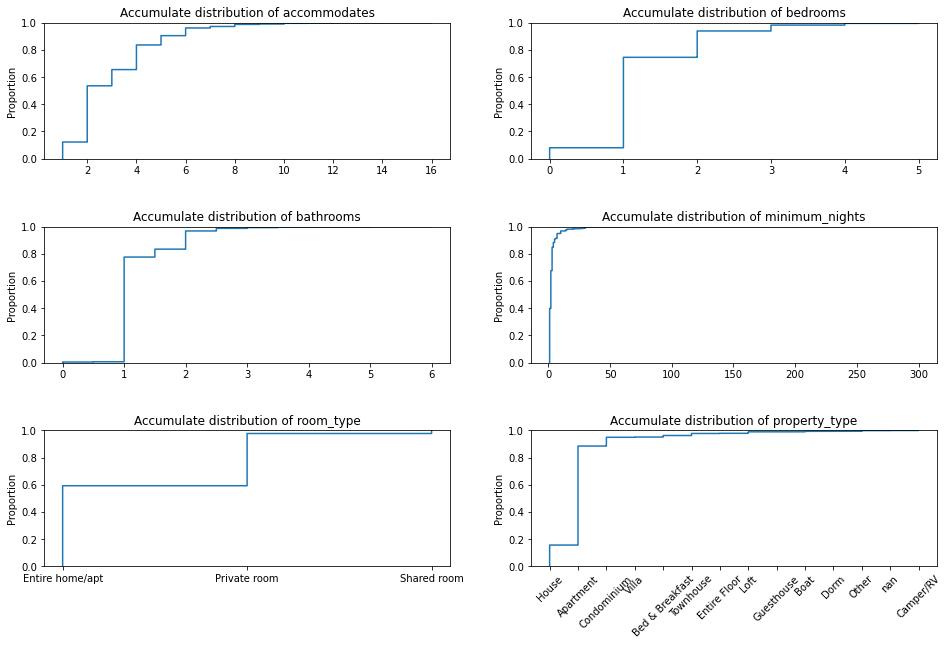

In [16]:
## Need to plot the variable
df.property_type = df.property_type.astype(str)

plt.figure(figsize = (16,10))
var_plot = ['accommodates','bedrooms','bathrooms','minimum_nights','room_type', 'property_type']
for i, var in enumerate(var_plot):
    plt.subplot(3,2,i+1)
    sns.ecdfplot(df[var])
    plt.title('Accumulate distribution of ' + var)  
    plt.xlabel('')
    plt.subplots_adjust(hspace = 0.5)
    if var == 'property_type':
        plt.setp(plt.subplot(3,2,i+1).xaxis.get_majorticklabels(), rotation=45)
        

Key annotations

- 80% of the properties in this dataset can accommodate up to 4 people, therefore it can be grouped 
- Less than 20% of the Airbnb have more than 2 bedrooms
- A vast majority of the places have only one bathroom
- Minimum nights variable needs to be checked before adding it into a model. It's not clear why the minimum reservation nights for a Airbnb can be  250 nights
- There are mainly two options of renting a room type, the entire aparment/house or a private room
- Up to 85% of the properties are either a house or an aparment

The amenities column has the following format:

In [17]:
df.amenities

0       {TV,"Wireless Internet",Kitchen,"Free Parking ...
1       {TV,Internet,"Wireless Internet","Air Conditio...
2       {TV,"Cable TV","Wireless Internet","Air Condit...
3       {TV,Internet,"Wireless Internet","Air Conditio...
4       {Internet,"Wireless Internet","Air Conditionin...
                              ...                        
3580    {Internet,"Wireless Internet","Air Conditionin...
3581    {TV,Internet,"Wireless Internet","Air Conditio...
3582    {"translation missing: en.hosting_amenity_49",...
3583    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
3584    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3585, dtype: object

It is necessary to clean this information to get any valuable insight

In [18]:
df.loc[:,df.columns == 'amenities'] = df['amenities'].apply(lambda x: x.replace('{','').replace('}','').replace('"',''))

In [19]:
amenities = pd.Series(np.concatenate(df.amenities.apply(lambda x: x.split(','))))
amenities = amenities.iloc[list(~amenities.isin(['"translation missing: en.hosting_amenity_49"'
                                                 ,'"translation missing: en.hosting_amenity_50"}']) == True)]

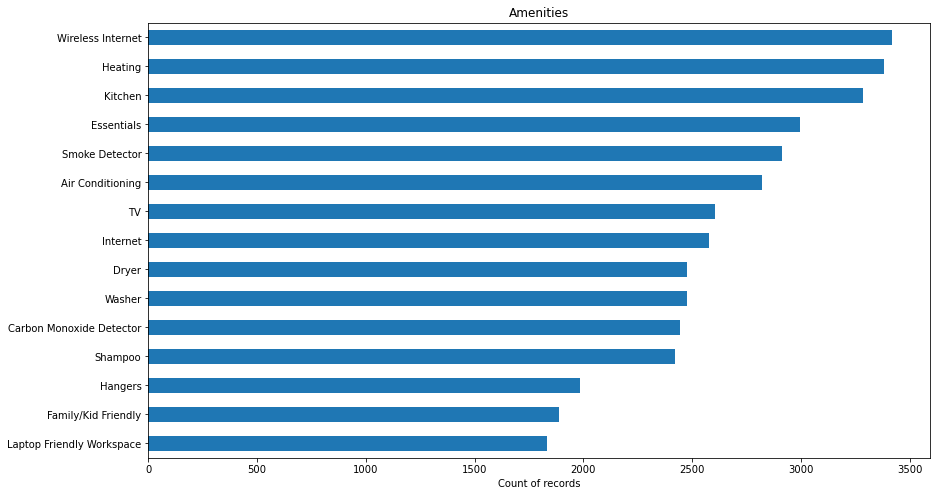

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
amenities.value_counts()[:15].plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Count of records')
plt.title('Amenities');

This variable is complicated to study due to all the combinations of amenities. For example, an aparment may have wireless internet, heating, kitchen, and shampoo, and a house wireless internet, heating, kitchen and carbon monoxide detector. In theory, both properties have a unique set of amenities, and it does, but if we're looking to implement any ML algorithm, it isn't appropiate to concatenate the combination of amenities and add it to the model.
One way of dealing with this variable is to create a dummy variable for each amenity, and then for each property add +50 columns indicating if the property has it or not. 

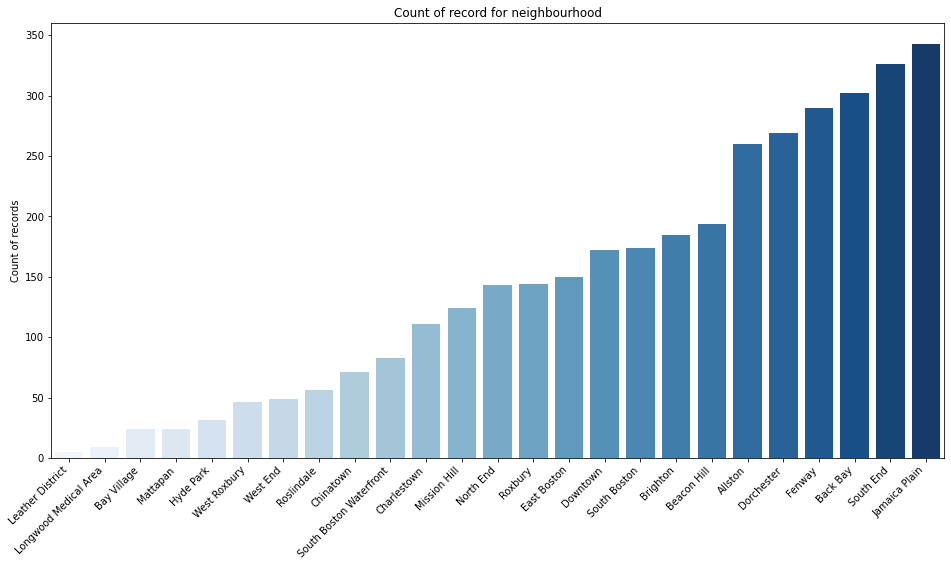

In [21]:
sort_order = df.neighbourhood_cleansed.value_counts().sort_values(ascending = True).index

fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(df.neighbourhood_cleansed, order = sort_order, palette = 'Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Count of record for neighbourhood')
plt.ylabel('Count of records')
plt.xlabel('');

A question araise, this distribution means that there are non-pleasurable tourists zones? 

# Multivariate distribution and interactions

### Host since

The *host_since* column is a date, an a date doesn't tell us anything, therefore a transformation is needed. 
A significant variable could be the months since the person became a host, so lets create that!
The initial format for the variable is the following:

In [22]:
df.host_since

0       2015-04-15
1       2012-06-07
2       2009-05-11
3       2013-04-21
4       2014-05-11
           ...    
3580    2014-07-31
3581    2015-07-02
3582    2014-01-14
3583    2016-05-27
3584    2015-08-20
Name: host_since, Length: 3585, dtype: object

In [23]:
meses_host = df.host_since.apply(lambda x: datetime.strptime(x,'%Y-%M-%d'))

In [24]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

df.host_since = meses_host.apply(lambda x: diff_month(datetime.strptime('2016-01-31','%Y-%M-%d'),x))   

The final format is numeric

In [25]:
df.host_since

0       12
1       48
2       84
3       36
4       24
        ..
3580    24
3581    12
3582    24
3583     0
3584    12
Name: host_since, Length: 3585, dtype: int64

It needs to be clarify that the date when the dataset was created is missing, I decided to get the max date of the column an assign that as the date to compare. This is the reason for the 2016-01-31 date. 

## Narrowing-down tails

### Number of reviews

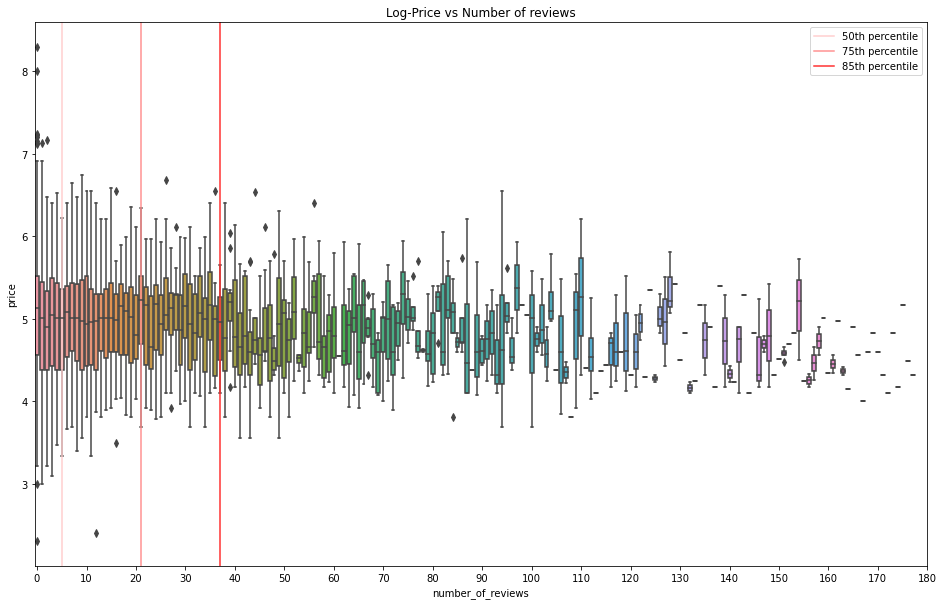

In [26]:
fig, ax = plt.subplots(figsize = (16,10))
sns.boxplot(y = 'price', x = 'number_of_reviews' , data = df)
xticks = []
for i in range(0,190, 10):
     xticks.append(i)
plt.setp(ax, xticks=xticks, xticklabels = xticks)
plt.title('Log-Price vs Number of reviews')
plt.axvline(x=np.percentile(df.number_of_reviews,50), color = '#FFCECE', label = '50th percentile')
plt.axvline(x=np.percentile(df.number_of_reviews,75), color = '#FF9191', label = '75th percentile')
plt.axvline(x=np.percentile(df.number_of_reviews,85), color = '#FF3030', label = '85th percentile')
plt.legend();


The graph illustrates the price distribution across the number of reviews. In addition, it's also shown the 50th, 75th, and 85th percentile of the distribution. The variable doesn't seem to be relevant. The medium price seems to be the same across all number of reviews. After the 75th percentile it becomes highly volatile probably because there are few observation within each number of observation.
I decided that the numbers of reviews greater that 54 will be assign the number 54, this in order to avoid vast tails. 

In [27]:
df.loc[df.number_of_reviews >= 54,['number_of_reviews']] = 54

The new boxplot looks like:

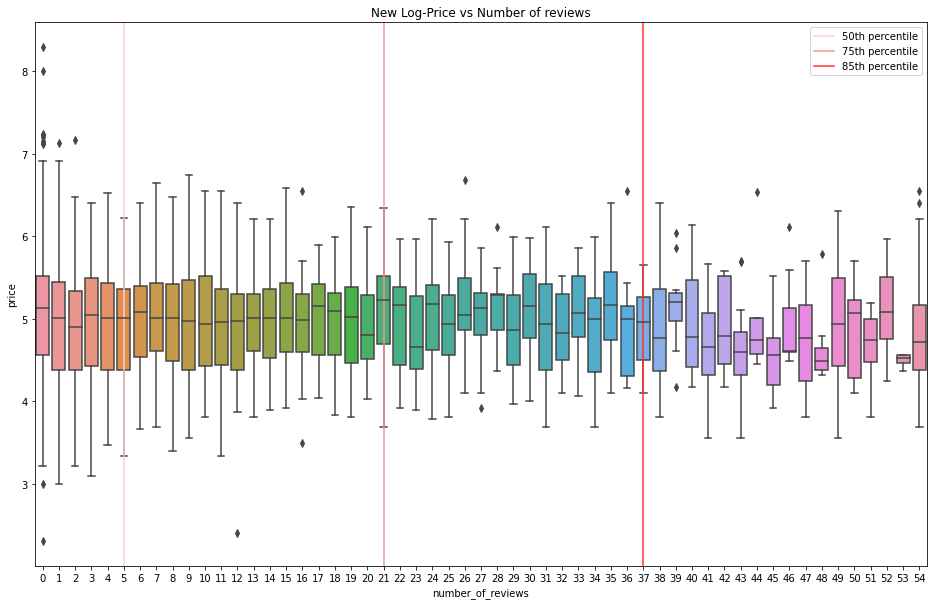

In [28]:
fig, ax = plt.subplots(figsize = (16,10))
sns.boxplot(y = 'price', x = 'number_of_reviews' , data = df)

plt.title('New Log-Price vs Number of reviews')
plt.axvline(x=np.percentile(df.number_of_reviews,50), color = '#FFCECE', label = '50th percentile')
plt.axvline(x=np.percentile(df.number_of_reviews,75), color = '#FF9191', label = '75th percentile')
plt.axvline(x=np.percentile(df.number_of_reviews,85), color = '#FF3030', label = '85th percentile')
plt.legend();

### Minimum nights

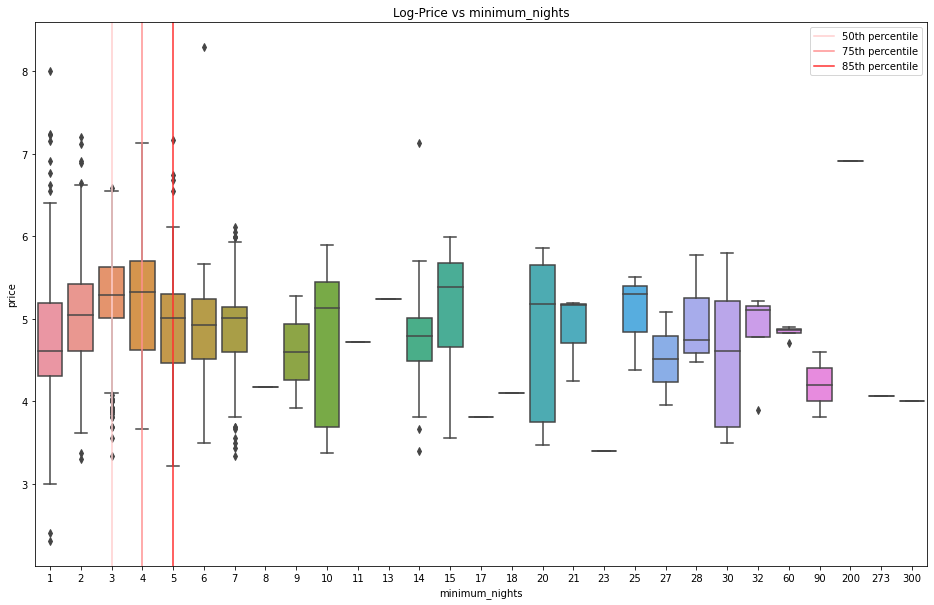

In [29]:
fig, ax = plt.subplots(figsize = (16,10))
sns.boxplot(y = 'price', x = 'minimum_nights' , data = df)
plt.title('Log-Price vs minimum_nights')
plt.axvline(x=np.percentile(df.minimum_nights,50), color = '#FFCECE', label = '50th percentile')
plt.axvline(x=np.percentile(df.minimum_nights,75), color = '#FF9191', label = '75th percentile')
plt.axvline(x=np.percentile(df.minimum_nights,85), color = '#FF3030', label = '85th percentile')
plt.legend();


With the same explanation as the previous literal, *minimum_nights* over 6 will be assigned to 6

In [30]:
df.loc[df.minimum_nights >= 6,['minimum_nights']] = 6 

The new boxplot looks like:

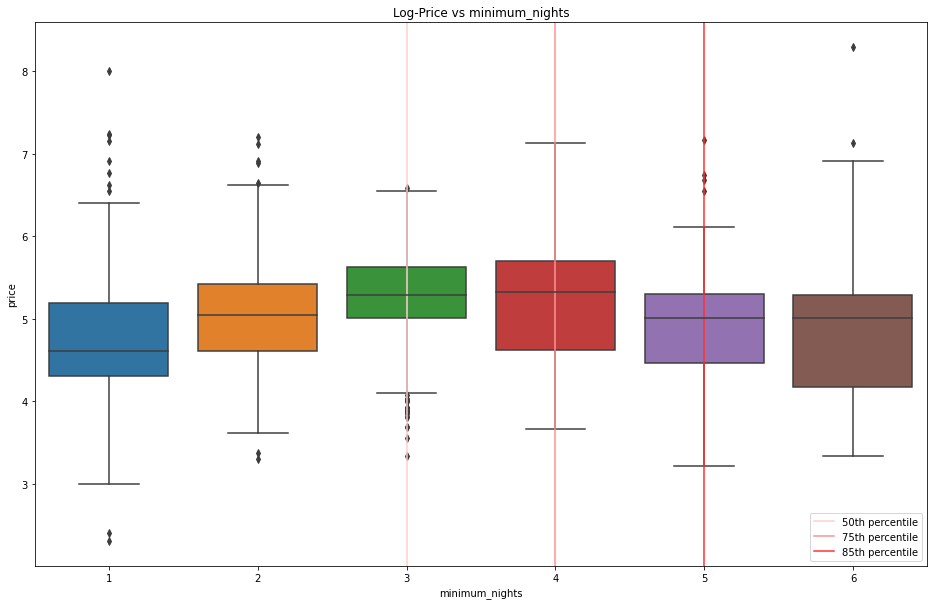

In [31]:
fig, ax = plt.subplots(figsize = (16,10))
sns.boxplot(y = 'price', x = 'minimum_nights' , data = df)
plt.title('Log-Price vs minimum_nights')
plt.axvline(x=np.percentile(df.minimum_nights,50), color = '#FFCECE', label = '50th percentile')
plt.axvline(x=np.percentile(df.minimum_nights,75), color = '#FF9191', label = '75th percentile')
plt.axvline(x=np.percentile(df.minimum_nights,85), color = '#FF3030', label = '85th percentile')
plt.legend();

## Property-related variables

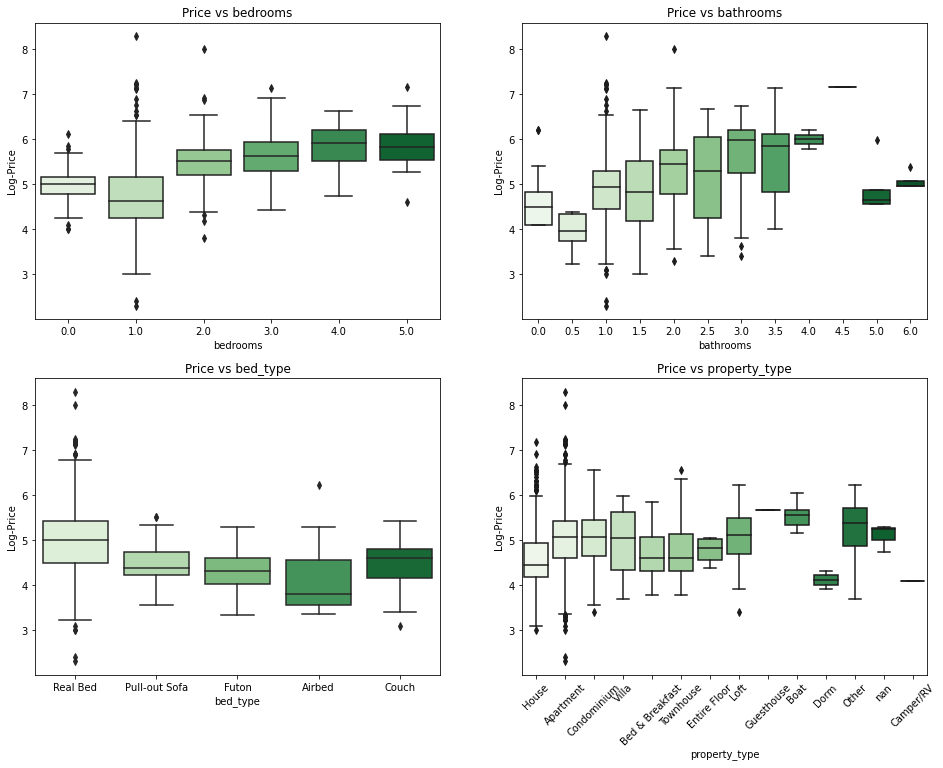

In [32]:
plt.figure(figsize = (16,12))
var = ['bedrooms', 'bathrooms', 'bed_type','property_type']
for i, var in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = 'price', x = var , data = df, palette = "Greens")
    plt.ylabel('Log-Price')
    plt.title('Price vs ' + var)
    if var == 'property_type':
        plt.setp(plt.subplot(2,2,i+1).xaxis.get_majorticklabels(), rotation=45)
    

Keynotes


- Linearity relation between bedrooms and price. Furthermore, it may indicate a case of diminish return law
- Similar to the number of bedrooms, it may present diminish returns law. 
- Looking at the boxplot of the real_bed and comparing to the other bed types is it an straightforward conclusion that people tend to choose real bed over sofas and couches. 
- The graph illustrates that houses tend to be cheaper than apartments. It may be possible that the apartments are located in downtown and the houses in the suburbs. 

### ¿zero bedrooms in an aparment?

Out of curiosity, in the first graph, there are properties without bedrooms, that doesn't make sense. Luckly, looking at the initial data, there are the URL associated to the advertisement. Viewing one of the links, it's clear why an aparment could be zero bedrooms and one bathroom. A LOFT!

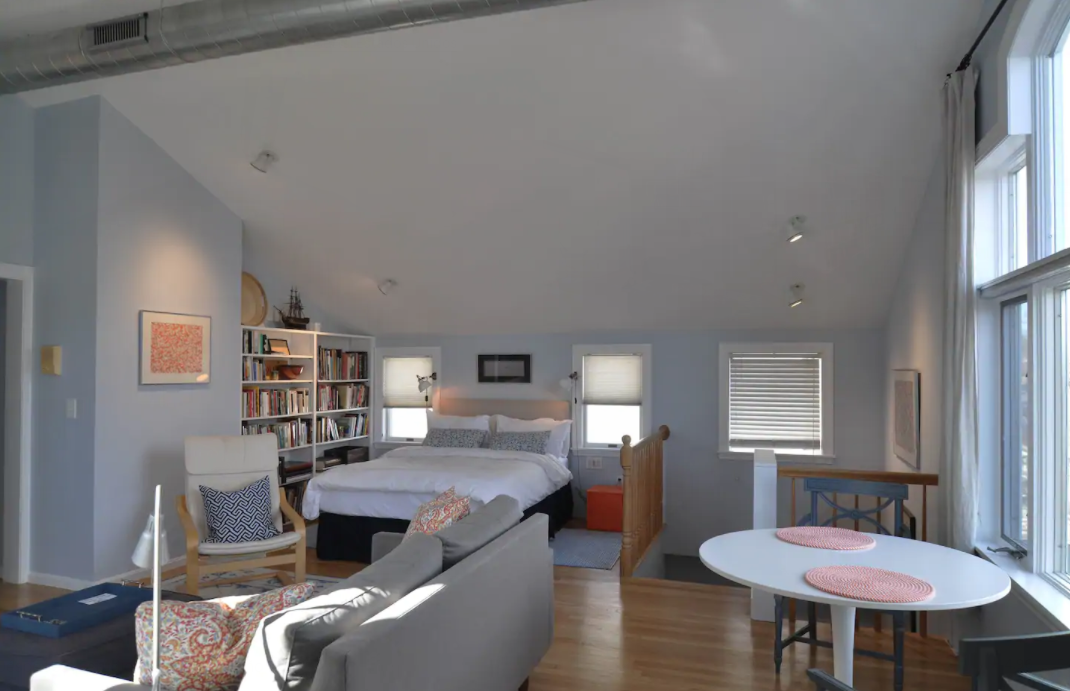

In [33]:
Image("loft.png")

## Other variables

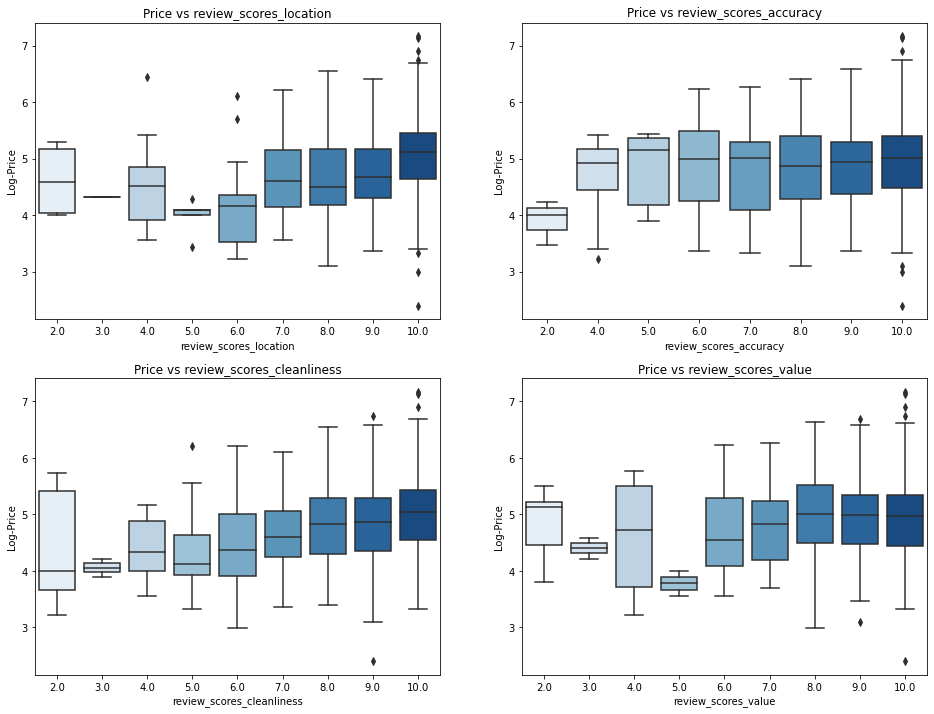

In [34]:
plt.figure(figsize = (16,12))
reviews_scores = df[['review_scores_location','review_scores_accuracy','review_scores_cleanliness','review_scores_value']]
for i, var in enumerate(reviews_scores):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = 'price', x = var, data = df, palette = 'Blues')
    plt.ylabel('Log-Price')
    plt.title('Price vs ' + var);
    

Keynotes

- *review_scores_location* and *review_scores_cleanliness* are correlated with the price of renting the property. This result is not surprising, well-located properties and cleanliness take part on the first impression.

### ¿Having a superhost can cause an increased in the price?

In [35]:
df['host_is_superhost'] = np.where(df['host_is_superhost'] == 'f',0,1)

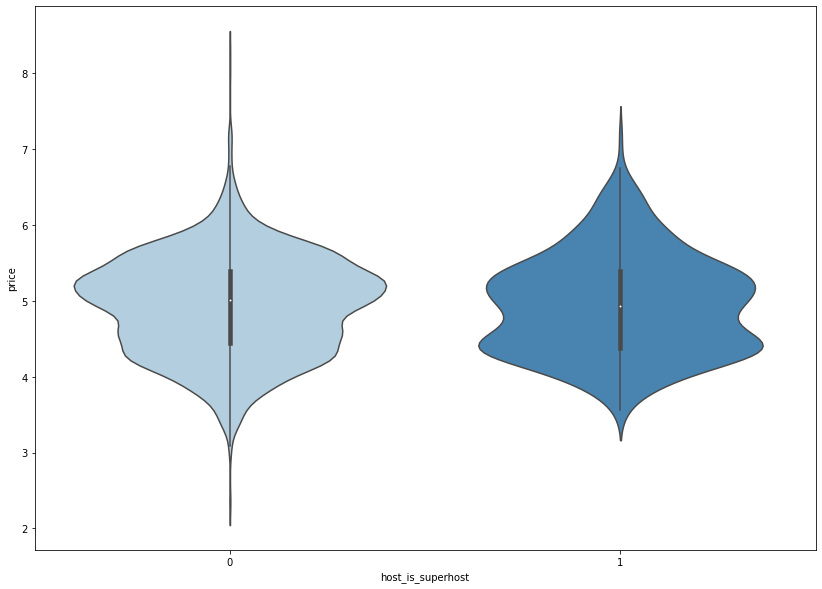

In [36]:
plt.figure(figsize = (14,10))
sns.violinplot(x = 'host_is_superhost', y = 'price', data = df, palette = 'Blues'); 

At first glance, there is no difference in the price of having a superhost or not. But lets partition this analysis within each neighbourhood.

### ¿Is there evidence of Simpson's Paradox in the superhost variable?

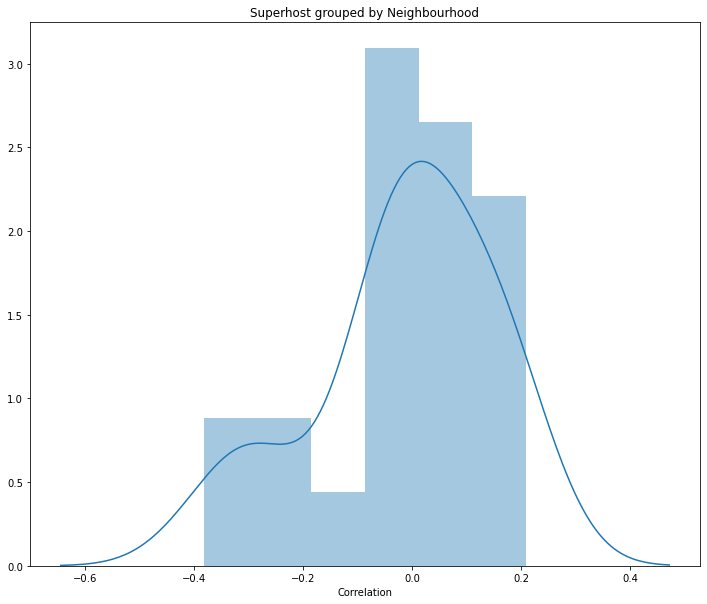

In [37]:
neighbourhood = df.neighbourhood_cleansed.unique()
cvec = dict()
for x in neighbourhood:
    temp = df[df['neighbourhood_cleansed'] == x]
    cvec[x] = temp.corr()['price']['host_is_superhost']

corr = list(cvec.values())

plt.figure(figsize = (12,10))
sns.distplot(corr)
plt.title('Superhost grouped by Neighbourhood')
plt.xlabel('Correlation')
plt.ylabel('');

Eventhough the overall distribution of the *host_is_superhost* variable may not show any relation with the price, if the data is partitioned among the neighbourhood and the correlation between *host_is_superhost* and *price* is calculated, it tends to have a positive correlation. 

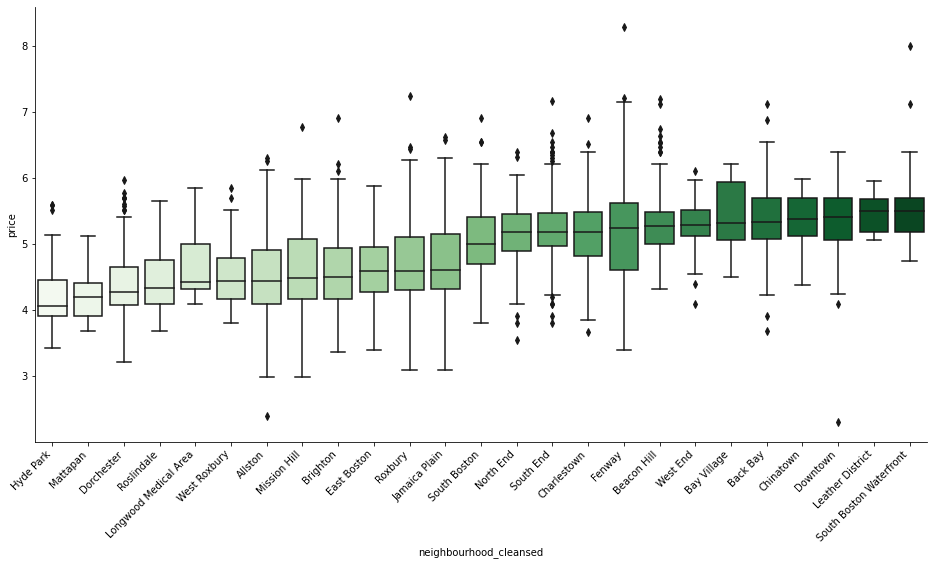

In [38]:
sort_order = df.query('price <= 500')\
                .groupby('neighbourhood_cleansed')['price']\
                .median()\
                .sort_values(ascending=True)\
                .index

fig, ax = plt.subplots(figsize = (16,8))
sns.boxplot(y='price', x='neighbourhood_cleansed', data=df.query('price <= 500'), 
            order=sort_order, palette = 'Greens')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.despine();

A question arraises, ¿Does the *price*, *neighbourhood* and the *customer scores for the location* have some relation? Lest create a map and investigate!  

# Maps 

#### The following graph shows the relationship between the coordinates and the price

In [39]:
max_value = df.price.max()
folium_hmap = folium.Map(width=800,height=500,
                         location = [42.366516, -71.057424],
                        zoom_start = 13)#,
                        ##tiles = "OpenStreetMap")
hm_wide = HeatMap(list(zip(df['latitude'], df['longitude'], df['price'])),
                 min_opacity = 0.1,
                 radious = 0.2,
                 blur = 6,
                 max_zoom = 15,
                 max_val = 100)
folium.TileLayer('Stamen Terrain').add_to(folium_hmap)
folium_hmap.add_child(hm_wide)

#### The following graph shows the relationship between the coordinates and the customer score of the property location

In [40]:
max_value = df.price.max()
folium_hmap = folium.Map(width=800,height=500,
                         location = [42.366516, -71.057424],
                        zoom_start = 13)#,
                        ##tiles = "OpenStreetMap")
hm_wide = HeatMap(list(zip(df[df['review_scores_location'].notnull()]['latitude']
                           , df[df['review_scores_location'].notnull()]['longitude']
                           , df[df['review_scores_location'].notnull()]['review_scores_location'])),
                 min_opacity = 0.1,
                 radious = 0.2,
                 blur = 6,
                 max_zoom = 15,
                 max_val = 100)
folium.TileLayer('Stamen Terrain').add_to(folium_hmap)
folium_hmap.add_child(hm_wide)

Undoubtedly there is a correlation between the clients perception of the location and the price paid by them. Moving away from dowtown will decrease the price of renting an Airbnb property. Lets quantize this relationship

## Correlations

<Figure size 1152x864 with 0 Axes>

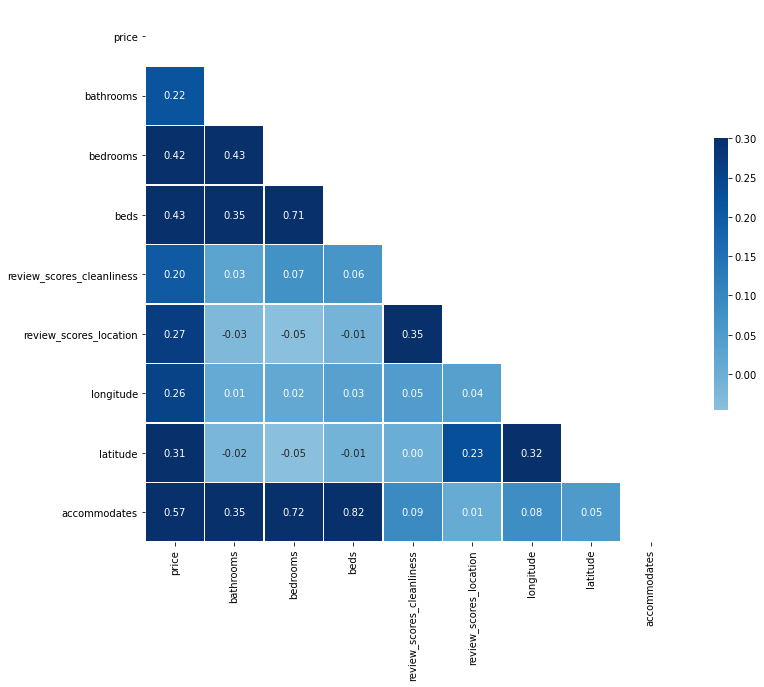

In [41]:
plt.figure(figsize = (16,12))
var_corr = ['price','bathrooms','bedrooms','beds','review_scores_cleanliness',
            'review_scores_location','longitude','latitude','accommodates']

corr = df[var_corr].corr()

mask = np.triu(np.ones_like(corr, dtype=bool));
f, ax = plt.subplots(figsize=(12, 10));

#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = '.2f');

This is a classical correlation matrix, stronger the linear relation, higher the correlation value. Fortunately there are some useful correlation that can be used in a ML algorithm with the price as a target. 

Reference table 
Log-price of $4 is $55 
Log-price of $5 is $148 
Log-price of $6 is $403


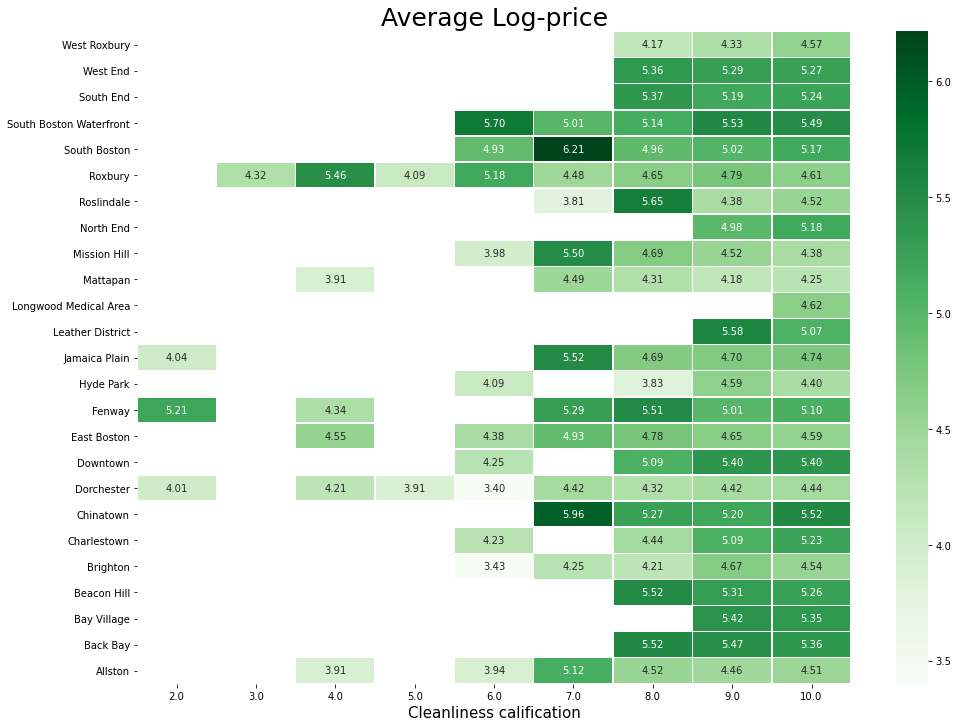

In [42]:
plt.figure(figsize = (16,12))
sns.heatmap(df.groupby(['neighbourhood_cleansed', 'review_scores_location'])\
                .mean()['price']\
                .reset_index()\
                .pivot('neighbourhood_cleansed', 'review_scores_location', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.2f', annot=True, linewidths=0.5)
plt.xlabel('Cleanliness calification', fontsize = 15)
plt.ylabel('')
plt.title('Average Log-price', fontsize = 25);

print('Reference table \nLog-price of $4 is ${} \nLog-price of $5 is ${} \nLog-price of $6 is ${}'\
      .format(round(np.exp(4)),round(np.exp(5)),round(np.exp(6))))

First lets explain this table. The neighbourhood are in the y-axis and the customer cleanliness satisfaction in the x_axis. Within each neighbourhood-cleanliness score combination is calculate the average price. Then it's plotted and colored to have some sort of perception of the price. 
Visualy, there is not a clear pattern between those variables, an ML model can specify this statment.

# Conclusions

- Some proper correlations were found between the target variable (price) and the independent variables.
- Especial caution is needed due to Sympson's paradox across the variables.
- Customer perception is an influential set of features that derives the price

## Next steps

- Construct and calibrate an ML algorithm with the analysed variables.
- Deeper exploration of the excluding variables. NLP models can be useful